Pymaceuticals Inc.

Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, how='left', on='Mouse ID')

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
total_mice = merge_df['Mouse ID'].nunique()
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_rows = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
print(dup_rows)
# Mouse ID g989 is the duplicate mouse

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [4]:
new_merge_df = merge_df.loc[merge_df['Mouse ID'] != 'g989', :]

In [5]:
new_merge_df["Mouse ID"].nunique()

248

In [6]:
new_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_df = new_merge_df.groupby("Drug Regimen")
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = round(grouped_df["Tumor Volume (mm3)"].mean(),2)
median = round(grouped_df["Tumor Volume (mm3)"].median(),2)
variance = round(grouped_df["Tumor Volume (mm3)"].var(),2)
standard_dev = round(grouped_df["Tumor Volume (mm3)"].std(),2)
sem = round(grouped_df["Tumor Volume (mm3)"].sem(),2)
summary_statistics = {"Mean": mean, "Median":median, "Variance":variance, 
                      "Standard Deviation": standard_dev, "SEM": sem}
summary_df = pd.DataFrame(summary_statistics)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


Bar and Pie Charts

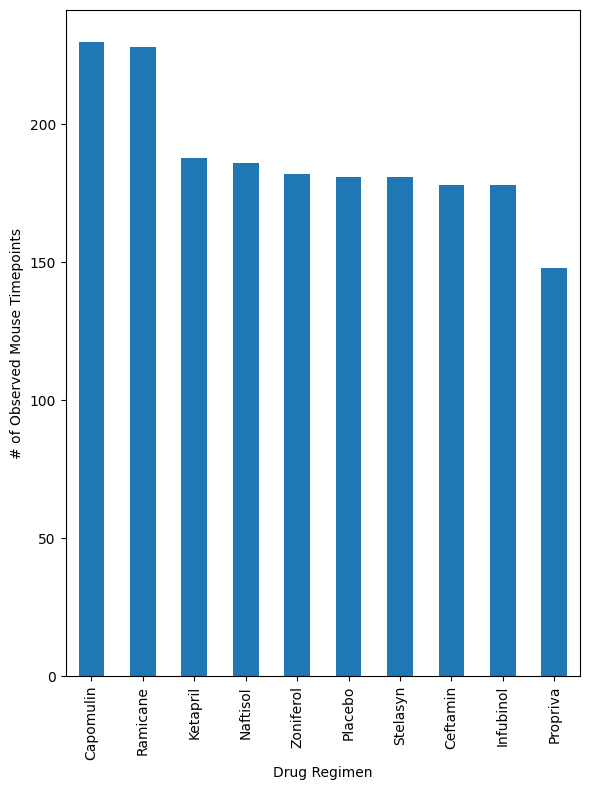

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_drug_regimen = grouped_df["Drug Regimen"].value_counts()
count_drug_regimen = count_drug_regimen.sort_values(ascending=False)
count_chart = count_drug_regimen.plot(kind='bar', figsize=(6,8))
count_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()

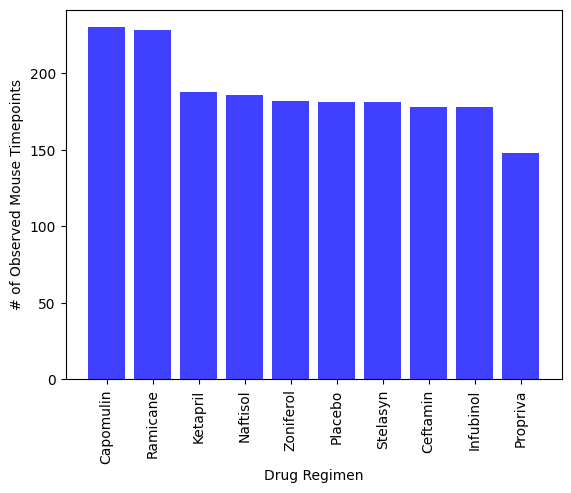

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = range(0, len(grouped_df['Drug Regimen']), 1)
y_axis = grouped_df['Drug Regimen'].count().sort_values(ascending=False)
tick_locations = [value for value in x_axis]
tick_names = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn',
              'Ceftamin', 'Infubinol', 'Propriva']
plt.bar(x_axis, y_axis, color='blue', alpha=0.75, align="center")
plt.xticks(tick_locations, tick_names)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

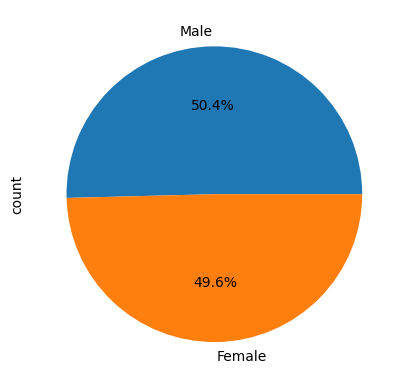

In [10]:
# Creating a pie plot using Pandas
new_mousedata = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989', :]
gender_count = new_mousedata["Sex"].value_counts()
gender_count.plot(kind='pie', autopct="%1.1f%%")

Text(0, 0.5, 'Count')

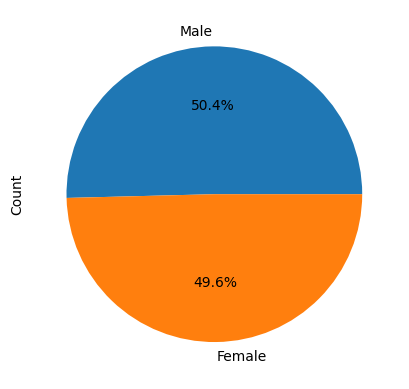

In [11]:
# Creating a pie chart using pyplot
labels = ['Male', 'Female']
plt.pie(gender_count, labels=labels, autopct="%1.1f%%")
plt.ylabel("Count")

Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_df = new_merge_df.loc[new_merge_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']), :]
reduced_df = reduced_df.loc[reduced_df.groupby('Mouse ID').apply(lambda x: x['Timepoint'].idxmax())]
reduced_df.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

C:\Users\ambmd\AppData\Local\Temp\ipykernel_3308\2504200143.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  reduced_df = reduced_df.loc[reduced_df.groupby('Mouse ID').apply(lambda x: x['Timepoint'].idxmax())]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

# Create empty list to fill with tumor vol data (for plotting)
capomulin_id = []
ramicane_id = []
infubinol_id = []
ceftamin_id = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in reduced_df.iterrows():
    if row['Drug Regimen'] == 'Capomulin':
        capomulin.append(row['Tumor Volume (mm3)'])
        capomulin_id.append(row['Mouse ID'])
    elif row['Drug Regimen'] == 'Ramicane':
        ramicane.append(row['Tumor Volume (mm3)'])
        ramicane_id.append(row['Mouse ID'])
    elif row['Drug Regimen'] == 'Infubinol':
        infubinol.append(row['Tumor Volume (mm3)'])
        infubinol_id.append(row['Mouse ID'])
    elif row['Drug Regimen'] == 'Ceftamin':
        ceftamin.append(row['Tumor Volume (mm3)'])
        ceftamin_id.append(row['Mouse ID'])

capomulin = pd.DataFrame(capomulin)
ramicane = pd.DataFrame(ramicane)
infubinol = pd.DataFrame(infubinol)
ceftamin = pd.DataFrame(ceftamin)

    # add subset
subset_capomulin = capomulin.sample(20)
subset_ramicane = ramicane.sample(20)
subset_infubinol = infubinol.sample(20)
subset_ceftamin = ceftamin.sample(20)
subsets = [capomulin.sample(20), ramicane.sample(20), infubinol.sample(20), ceftamin.sample(20)]
# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin.iloc[0,0]
upperq_capomulin = quartiles_capomulin.iloc[2,0]
iqr_capomulin = upperq_capomulin-lowerq_capomulin


lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)

print(f"Capomulin's potential outliers: {lower_bound_capomulin} and {upper_bound_capomulin}.")

quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane.iloc[0,0]
upperq_ramicane = quartiles_ramicane.iloc[2,0]
iqr_ramicane = upperq_ramicane-lowerq_ramicane


lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)

print(f"Ramicane's potential outliers: {lower_bound_ramicane} and {upper_bound_ramicane}.")

quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol.iloc[0,0]
upperq_infubinol = quartiles_infubinol.iloc[2,0]
iqr_infubinol = upperq_infubinol-lowerq_infubinol


lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)

print(f"Infubinol's's potential outliers: {lower_bound_infubinol} and {upper_bound_infubinol}.")

quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin.iloc[0,0]
upperq_ceftamin = quartiles_ceftamin.iloc[2,0]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin


lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)

print(f"Ceftamin's potential outliers: {lower_bound_capomulin} and {upper_bound_capomulin}.")

    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: 20.70456164999999 and 51.83201549.
Ramicane's potential outliers: 17.912664470000003 and 54.30681135.
Infubinol's's potential outliers: 36.83290494999999 and 82.74144559000001.
Ceftamin's potential outliers: 20.70456164999999 and 51.83201549.


<Axes: title={'center': 'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

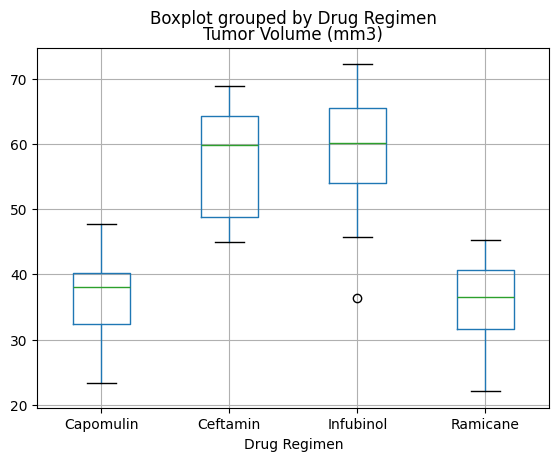

In [14]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
reduced_df.boxplot('Tumor Volume (mm3)', by = 'Drug Regimen')

Line and Scatter Plots

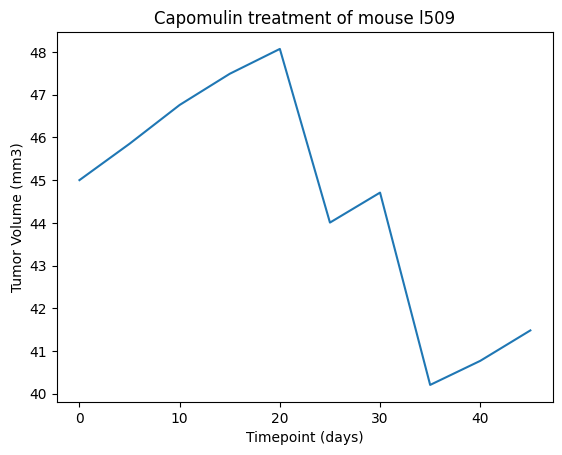

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509 = new_merge_df.loc[new_merge_df['Mouse ID'] == 'l509',:]
plt.plot(l509["Timepoint"], l509['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

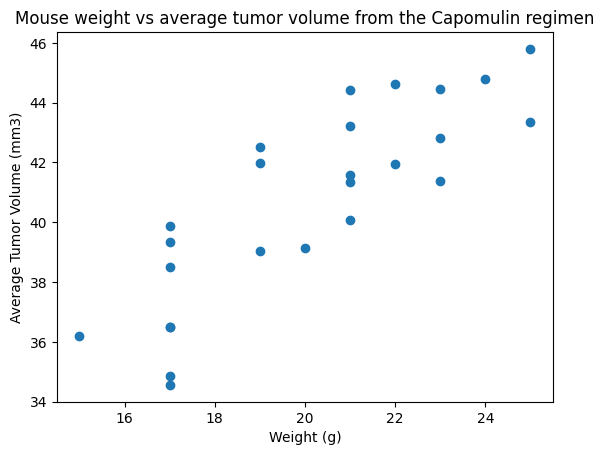

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = pd.DataFrame(new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Capomulin',:])
capomulin_mouse = capomulin.groupby("Mouse ID")
averages = capomulin_mouse['Tumor Volume (mm3)'].mean()
weight = capomulin_mouse['Weight (g)'].unique()
plt.scatter(weight, averages)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs average tumor volume from the Capomulin regimen")
plt.show()

Correlation and Regression

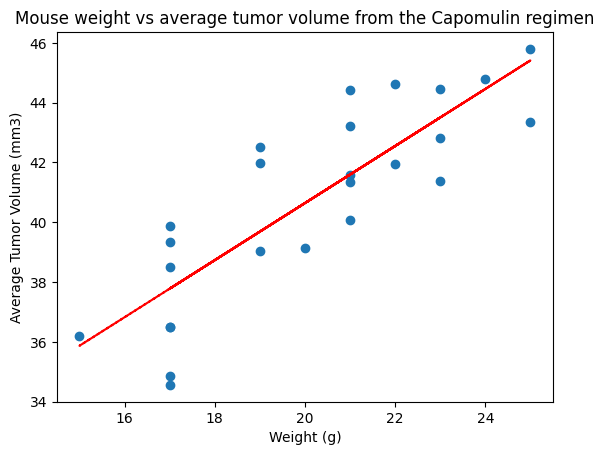

In [17]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin = pd.DataFrame(new_merge_df.loc[new_merge_df['Drug Regimen'] == 'Capomulin',:])
capomulin_mouse = capomulin.groupby("Mouse ID")
averages = capomulin_mouse['Tumor Volume (mm3)'].mean()
weight = capomulin_mouse['Weight (g)'].unique().astype('int')
aw_slope, aw_int, aw_r, aw_p, aw_std_err = st.linregress(weight, averages)
aw_fit = aw_slope * weight + aw_int
plt.scatter(weight, averages)
plt.plot(weight,aw_fit,"--", color = 'red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse weight vs average tumor volume from the Capomulin regimen")
plt.show()
